Міністерство освіти і науки України
Національний технічний університет України
"Київський політехнічний інститут імені Ігоря Сікорського"
Фізико-технічний інститут



                                                ПІДГОТОВКА ТА АНАЛІЗ ДАНИХ
                                                Лабораторна робота № 6
                                                Застосування numpy







                                                                                                             Виконав:
                                                                                                            студент гр. ФБ-24 Берещук Р.Р.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу
результатів.

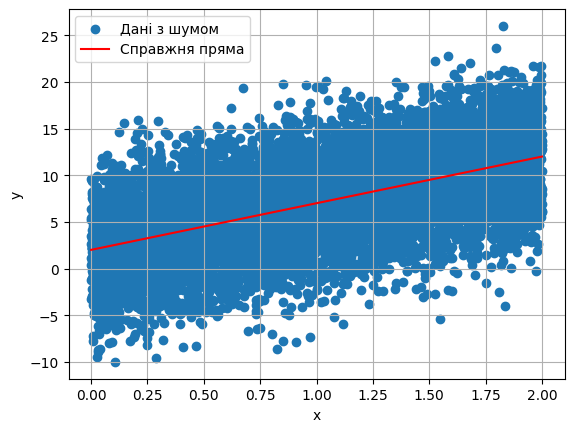

In [54]:
import numpy as np
import matplotlib.pyplot as plt

k = 5
b = 2

x = np.linspace(0, 2, 10000)

noise = np.random.normal(0, 4, 10000)
y = k * x + b + noise

plt.scatter(x, y, label='Дані з шумом')
plt.plot(x, k * x + b, color="red", label='Справжня пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b
<image src="sqr.png" alt="Текст с описанием картинки">


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

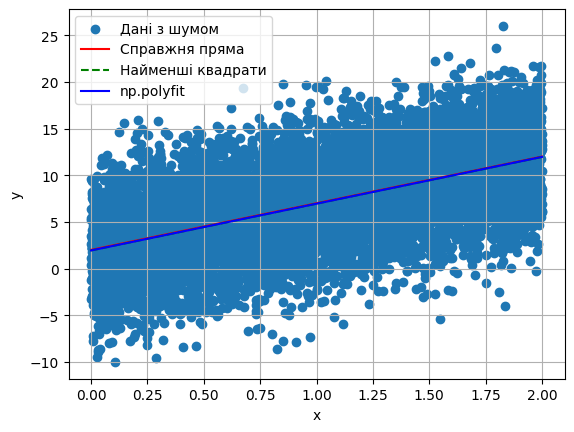

Параметри початкової прямої:
k = 5
b = 2

Найменшиі квадратіи:
kh = 5.013244776017795
bh = 1.9368780804577108

np.polyfit:
k_np_poly = 5.013244776017798
b_np_poly = 1.936878080457707


In [55]:

def least_squares_method(x, y):
    n = len(x)  
    kh = (n * (x * y).sum() - x.sum() * y.sum()) / (n * (x * x).sum() - x.sum() ** 2)
    bh = (y.sum() - kh * x.sum()) / n
    return kh, bh



# def least_squares_method(x, y):
#     n = len(x)
#     sum_x = np.sum(x)
#     sum_y = np.sum(y)
#     sum_xy = np.sum(x * y)
#     sum_xx = np.sum(x*x)
    
#     # Обчислюємо коефіцієнти прямої
#     kh = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
#     bh = (sum_y - kh * sum_x) / n
#     return kh, bh

kh, bh = least_squares_method(x, y)
coefficients = np.polyfit(x, y, 1)
k_np_poly = coefficients[0]
b_np_poly = coefficients[1]

plt.scatter(x, y, label="Дані з шумом")
plt.plot(x, k * x + b, color='red', label='Справжня пряма')
plt.plot(x, kh *  x + bh, color='green', linestyle='--', label='Найменші квадрати')
plt.plot(x, k_np_poly * x + b_np_poly, color='blue', label='np.polyfit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Параметри початкової прямої:")
print("k =", k)
print("b =", b)
print()
print("Найменшиі квадратіи:")
print("kh =", kh)
print("bh =", bh)
print()
print("np.polyfit:")
print("k_np_poly =", k_np_poly)
print("b_np_poly =", b_np_poly)






1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

4.129740294981688 2.8889364078899513


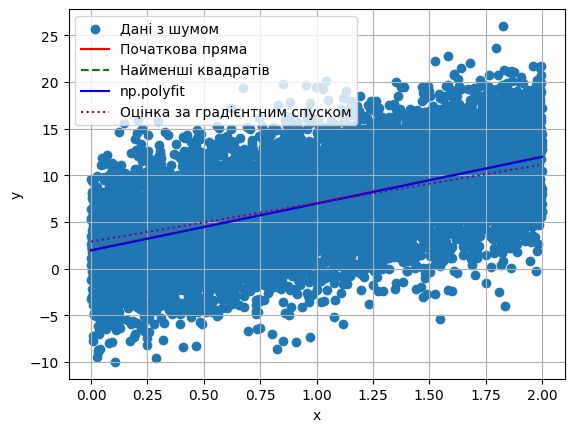

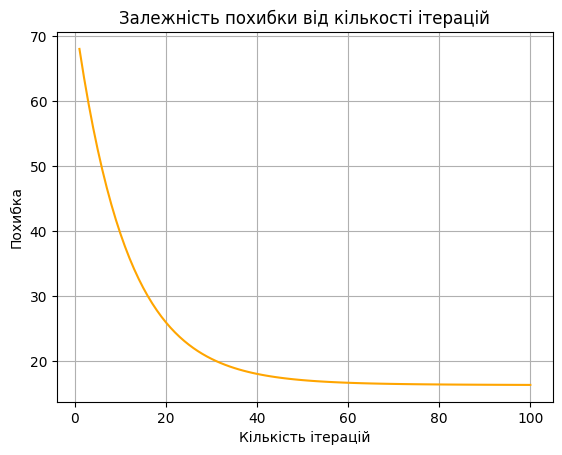

In [58]:

def gradient_descent(x, y, learning_rate, n_iter):
    kh = 0
    bh = 0
    n = len(x)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    for _ in range(n_iter):
        y_prediction = kh * x + bh
        k_grad = (-2/n) * np.sum(x * (y - y_prediction))
        b_grad = (-2/n) * np.sum(y - y_prediction)
        
        kh = kh - learning_rate * k_grad
        bh = bh - learning_rate * b_grad
    
    return kh, bh

learning_rate = 0.01 
n_iter = 100  

k_gradient, b_gradient = gradient_descent(x, y, learning_rate, n_iter)
print(k_gradient, b_gradient)

plt.scatter(x, y, label='Дані з шумом')
plt.plot(x, k * x + b, color='red', label='Початкова пряма')
plt.plot(x, kh * x + bh, color='green', linestyle='--', label='Найменші квадратів')
plt.plot(x, k_np_poly * x + b_np_poly, color='blue', linestyle='-', label='np.polyfit')
plt.plot(x, k_gradient * x + b_gradient, color='purple', linestyle=':', label="Оцінка за градієнтним спуском")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

def loss_function(x, y, slope, intercept):
    y_prediction =  slope * x + intercept
    return np.mean((y_prediction - y)** 2)

errors = []
iterations = range(1, n_iter + 1)
for i in iterations:
    k_gradient, b_gradient = gradient_descent(x, y, learning_rate, i)
    error = loss_function(x, y, k_gradient, b_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='orange')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій') 
plt.grid(True)
plt.show()






